## Load the Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# File paths
sales_file = "project.sales.cities.csv"
acs_file = "project.acs.cities.csv"

# Load datasets
sales_data = pd.read_csv(sales_file)
acs_data = pd.read_csv(acs_file)

In [3]:
# Display initial rows
print(sales_data.head())
print(acs_data.head())

          city  category  sale.dollars  sale.volume
0  Cedar Falls      Misc        494165        27993
1  Cedar Falls    Whisky       1568696        93104
2  Cedar Falls       Rum        809757        57070
3  Cedar Falls    Brandy         80056         4982
4  Cedar Falls  Amaretto         21811         2194
       city  high.school  bachelor  unemployment   income  population  \
0    Ackley         88.8      20.0           4.0  30790.0        1738   
1  Ackworth         85.5      12.7           9.1  41250.0          66   
2     Adair         96.6      19.0           6.8  32639.0         813   
3      Adel         93.7      32.0           3.1  37130.0        4030   
4     Afton         89.4      11.5           5.7  27457.0         967   

   pop.white  pop.black  pop.indian  pop.asian  pop.hawai  pop.other  \
0       1715          0           0          0          0         15   
1         66          0           0          0          0          0   
2        788          4          

## Merge the Data

In [4]:
# Assuming both datasets have a common column like 'city'
merged_data = pd.merge(sales_data, acs_data, on='city', how='inner')
print(merged_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3693 entries, 0 to 3692
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          3693 non-null   object 
 1   category      3693 non-null   object 
 2   sale.dollars  3693 non-null   int64  
 3   sale.volume   3693 non-null   int64  
 4   high.school   3693 non-null   float64
 5   bachelor      3693 non-null   float64
 6   unemployment  3693 non-null   float64
 7   income        3693 non-null   float64
 8   population    3693 non-null   int64  
 9   pop.white     3693 non-null   int64  
 10  pop.black     3693 non-null   int64  
 11  pop.indian    3693 non-null   int64  
 12  pop.asian     3693 non-null   int64  
 13  pop.hawai     3693 non-null   int64  
 14  pop.other     3693 non-null   int64  
 15  pop.multi     3693 non-null   int64  
dtypes: float64(4), int64(10), object(2)
memory usage: 461.8+ KB
None


In [5]:
# Identify data types
print(merged_data.dtypes)

# Check non-numeric columns
non_numeric_columns = merged_data.select_dtypes(exclude=['float', 'int']).columns
print("Non-numeric columns:", non_numeric_columns)

city             object
category         object
sale.dollars      int64
sale.volume       int64
high.school     float64
bachelor        float64
unemployment    float64
income          float64
population        int64
pop.white         int64
pop.black         int64
pop.indian        int64
pop.asian         int64
pop.hawai         int64
pop.other         int64
pop.multi         int64
dtype: object
Non-numeric columns: Index(['city', 'category'], dtype='object')


# Relationship between Alcohol Consumption and Factors

### Descriptive Stats

       sale.dollars    sale.volume  high.school     bachelor  unemployment  \
count  3.693000e+03    3693.000000  3693.000000  3693.000000   3693.000000   
mean   7.135971e+04    4898.968589    91.302979    20.532413      4.439968   
std    3.841631e+05   25213.949070     4.731832    10.247156      2.529739   
min    1.000000e+00       0.000000    65.600000     0.000000      0.000000   
25%    6.730000e+02      48.000000    89.200000    14.500000      2.700000   
50%    4.448000e+03     320.000000    91.700000    18.200000      4.000000   
75%    2.352100e+04    1855.000000    94.500000    22.900000      5.800000   
max    1.222523e+07  771338.000000    99.200000    65.800000     16.900000   

             income     population      pop.white     pop.black   pop.indian  \
count   3693.000000    3693.000000    3693.000000   3693.000000  3693.000000   
mean   30605.576496    6153.525047    5456.658814    267.577308    19.542377   
std     6234.323681   17301.973742   14231.855381   1578.

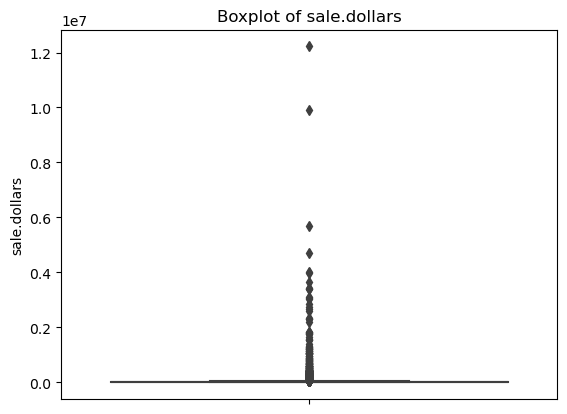

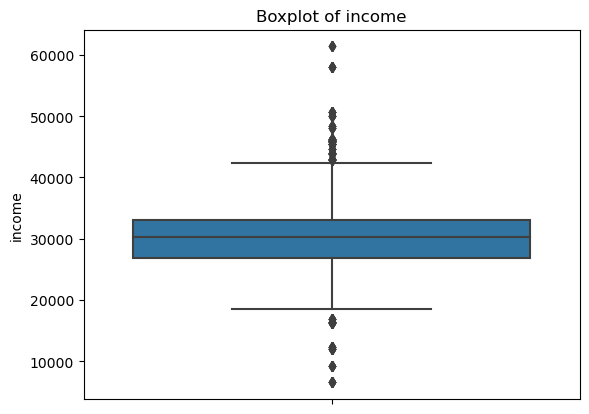

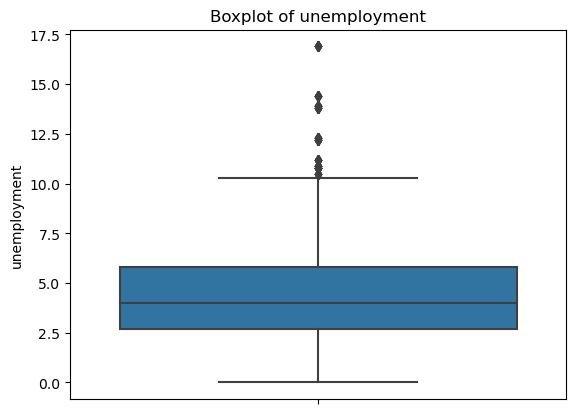

In [6]:
print(merged_data.describe())

# Boxplots for outlier detection
for column in ['sale.dollars', 'income', 'unemployment']:
    sns.boxplot(y=merged_data[column])
    plt.title(f"Boxplot of {column}")
    plt.show()


### Correlation Heatmap

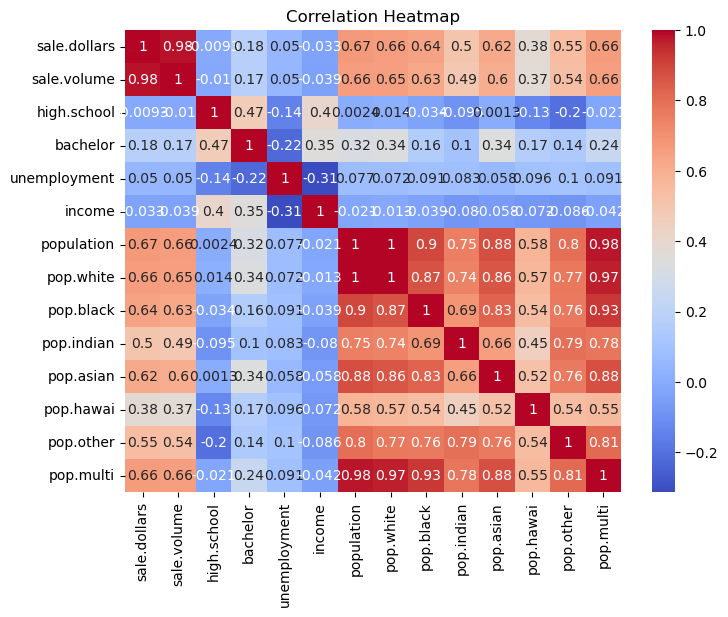

In [7]:
# Drop non-numeric columns for correlation
numeric_data = merged_data.select_dtypes(include=['float', 'int'])

# Compute correlation matrix
correlation_matrix = numeric_data.corr()

# Plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [8]:
merged_data.rename(
    columns={
        "sale.dollars": "alcohol_consumption_dollars",
        "sale.volume": "alcohol_consumption_volume",
    },
    inplace=True,
)

### Correlation Matrix-Dollar

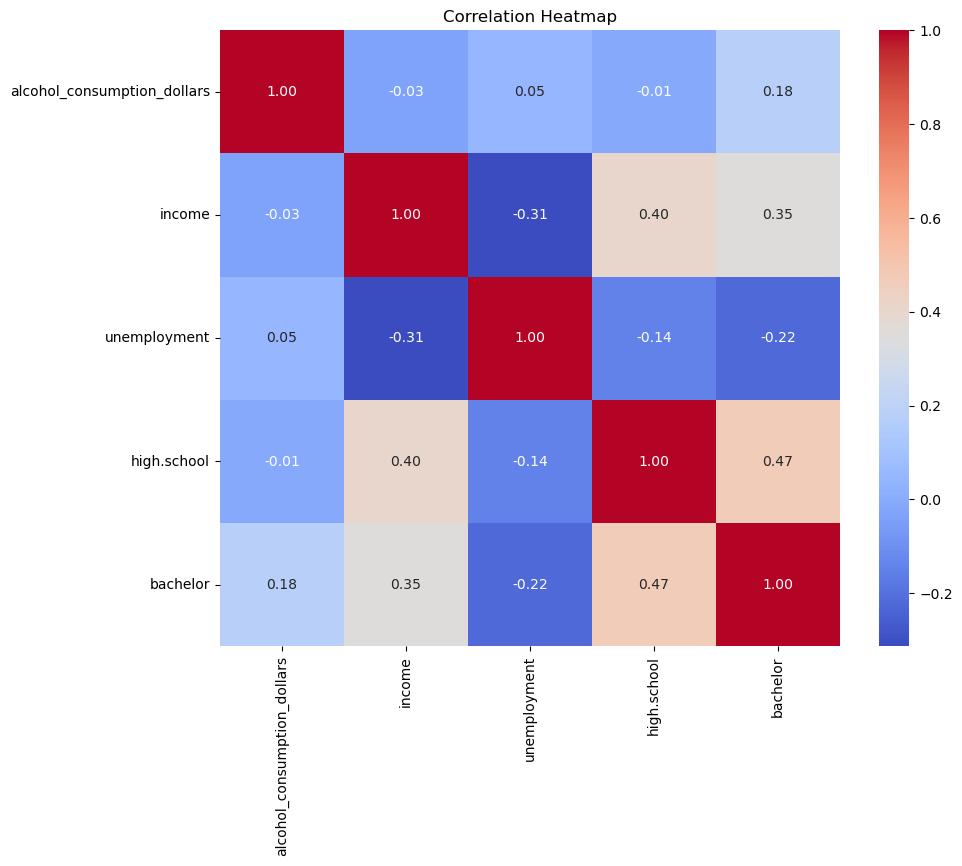

In [9]:
# Compute correlation matrix
correlation_matrix = merged_data[
    [
        "alcohol_consumption_dollars",
        "income",
        "unemployment",
        "high.school",
        "bachelor"
    ]
].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


### Correlation Matrix-Volume

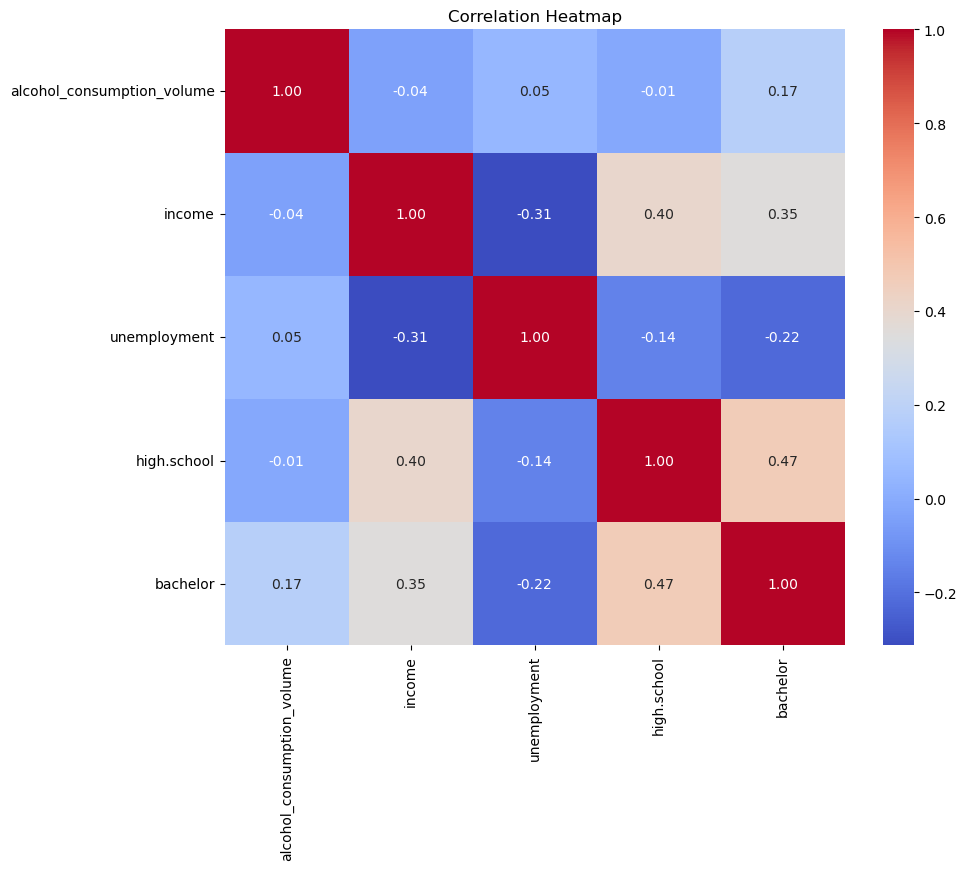

In [10]:
# Compute correlation matrix
correlation_matrix = merged_data[
    [
        "alcohol_consumption_volume",
        "income",
        "unemployment",
        "high.school",
        "bachelor"
    ]
].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### Boxplot of Descriptive Statistics

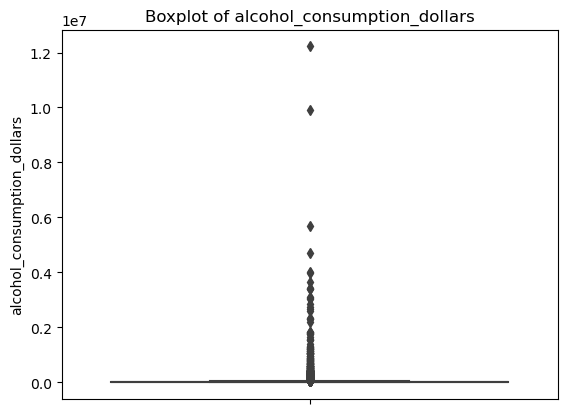

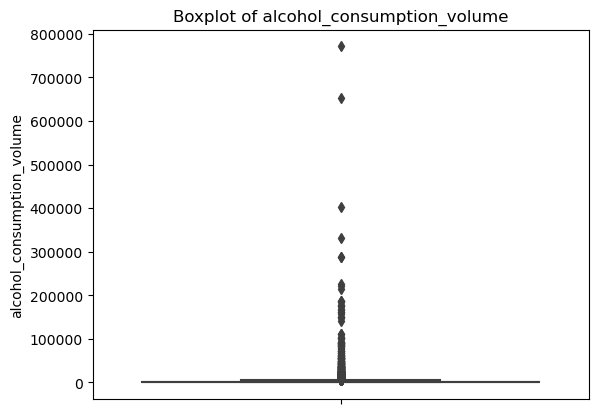

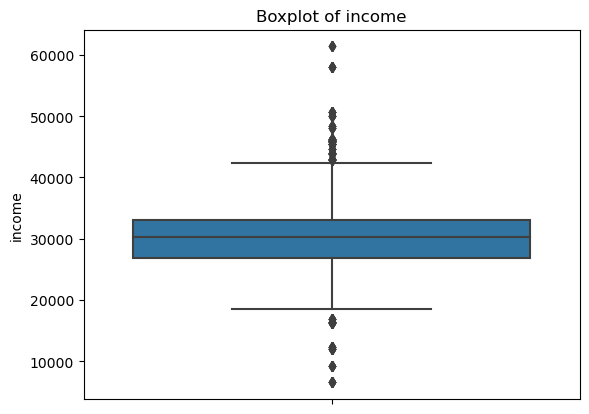

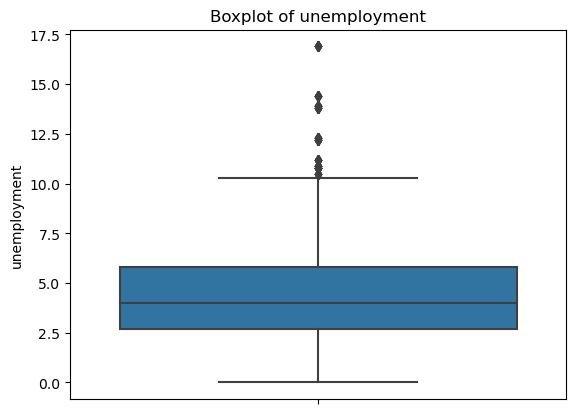

In [11]:
for column in [
    "alcohol_consumption_dollars",
    "alcohol_consumption_volume",
    "income",
    "unemployment",
]:
    if column in merged_data.columns:
        sns.boxplot(y=merged_data[column])
        plt.title(f"Boxplot of {column}")
        plt.show()
    else:
        print(f"Column '{column}' not found in merged_data.")


### Variable Distribution

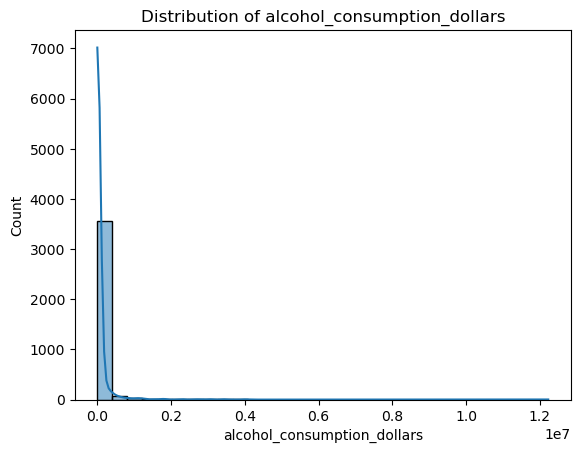

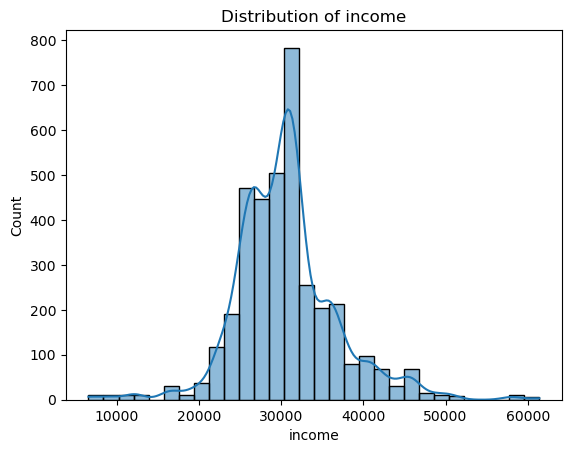

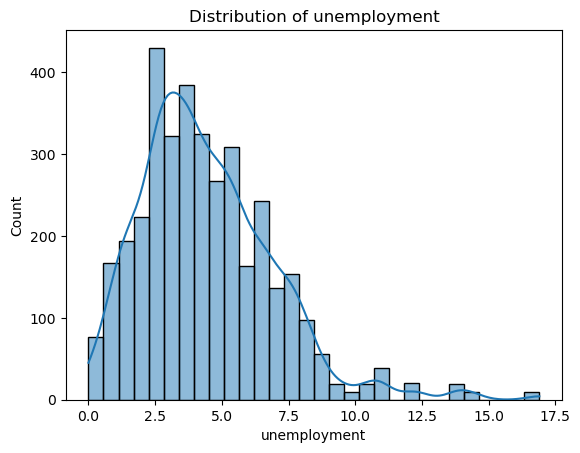

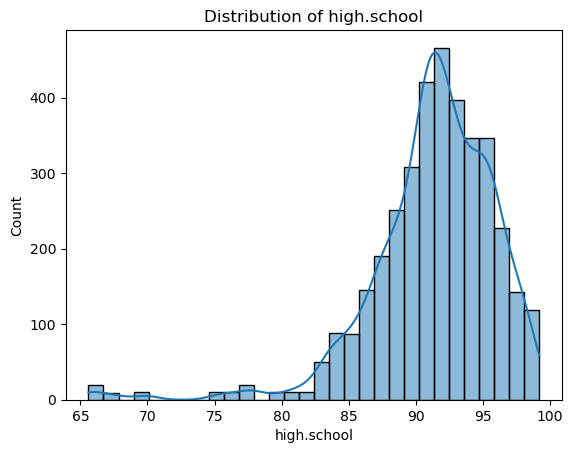

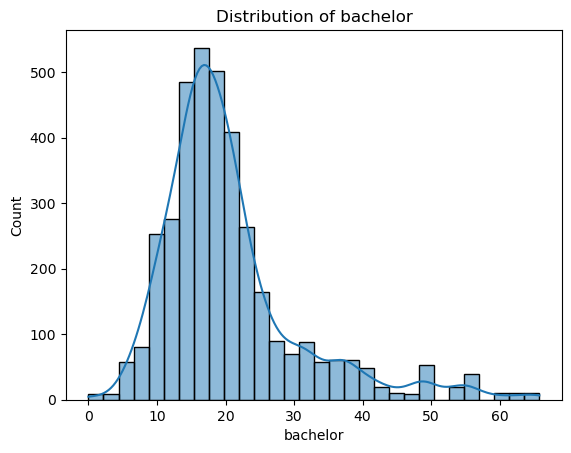

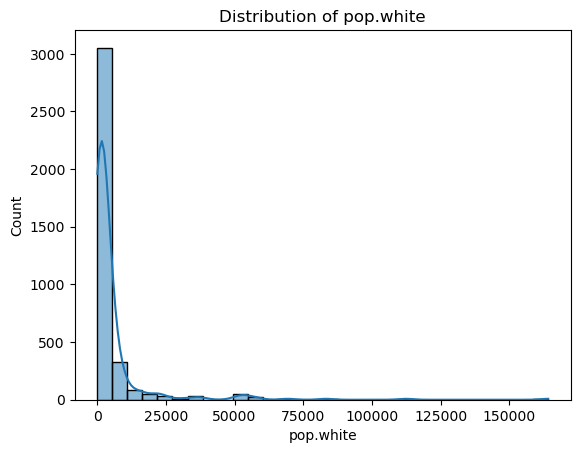

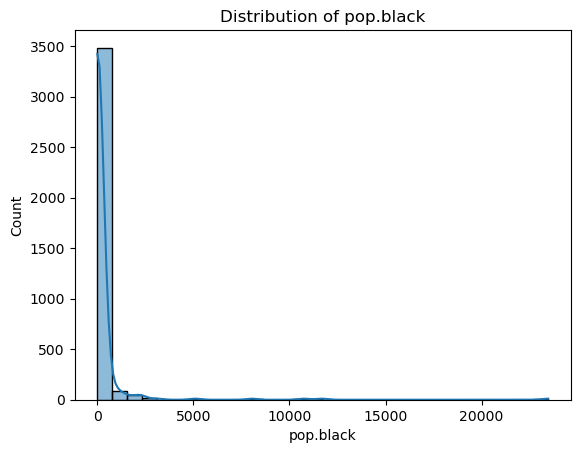

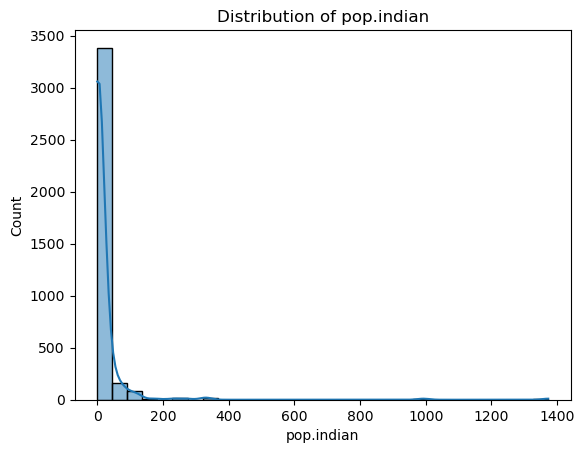

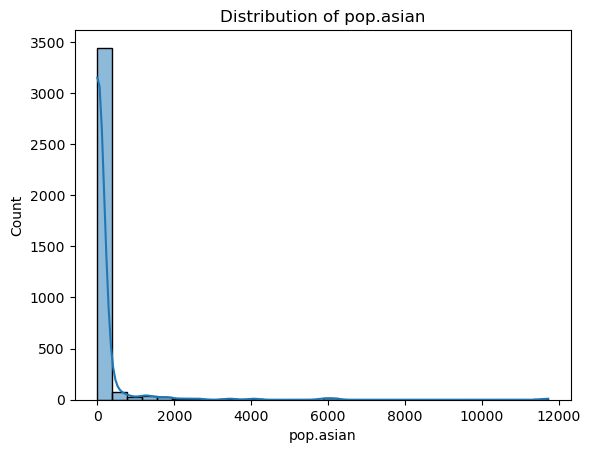

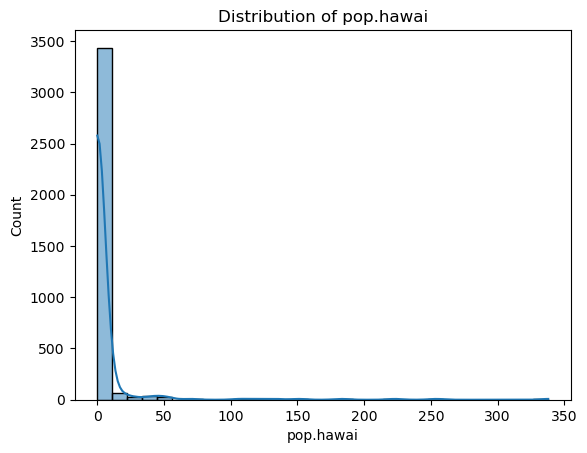

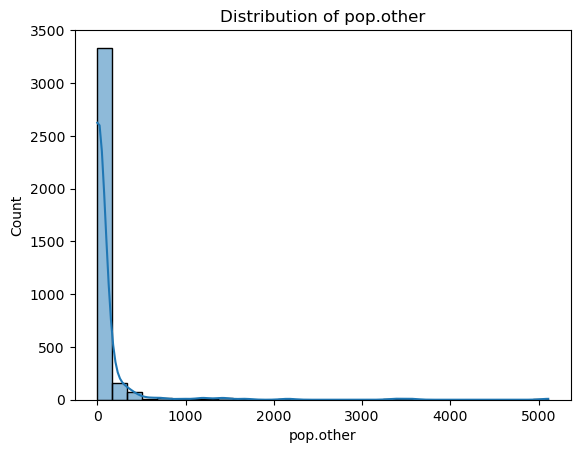

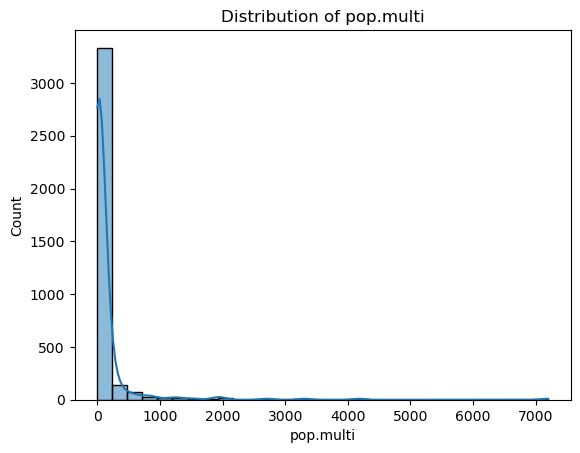

In [12]:
# Histograms
for column in ['alcohol_consumption_dollars', 'income', 'unemployment','high.school','bachelor','pop.white', 'pop.black', 'pop.indian', 'pop.asian','pop.hawai','pop.other','pop.multi']:
    sns.histplot(merged_data[column], kde=True, bins=30)
    plt.title(f"Distribution of {column}")
    plt.show()


### Scatter Plot with Regression Lines-Dollar

/Users/yuhanzhao/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/yuhanzhao/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/yuhanzhao/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/yuhanzhao/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


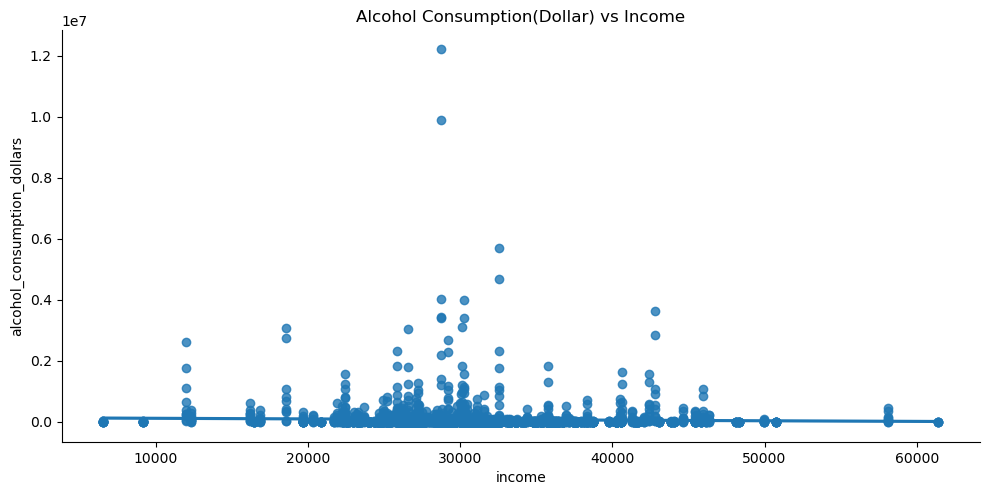

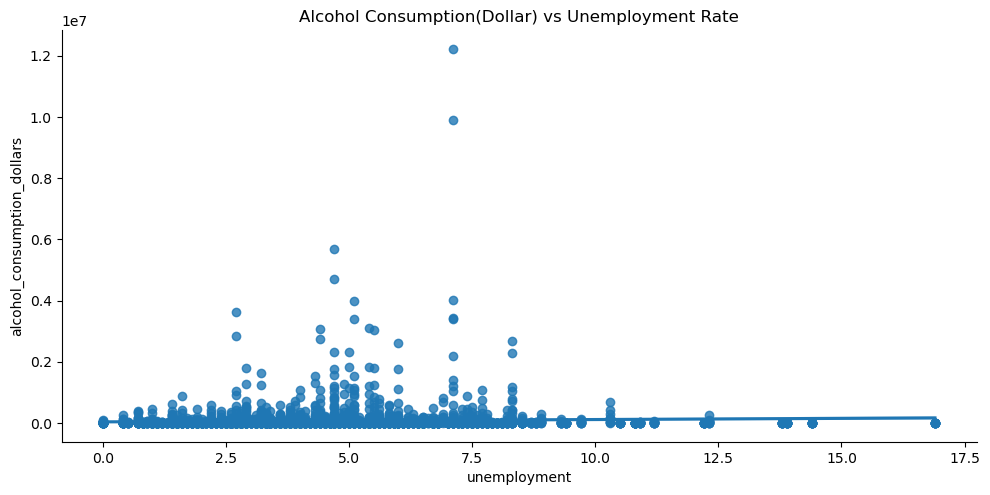

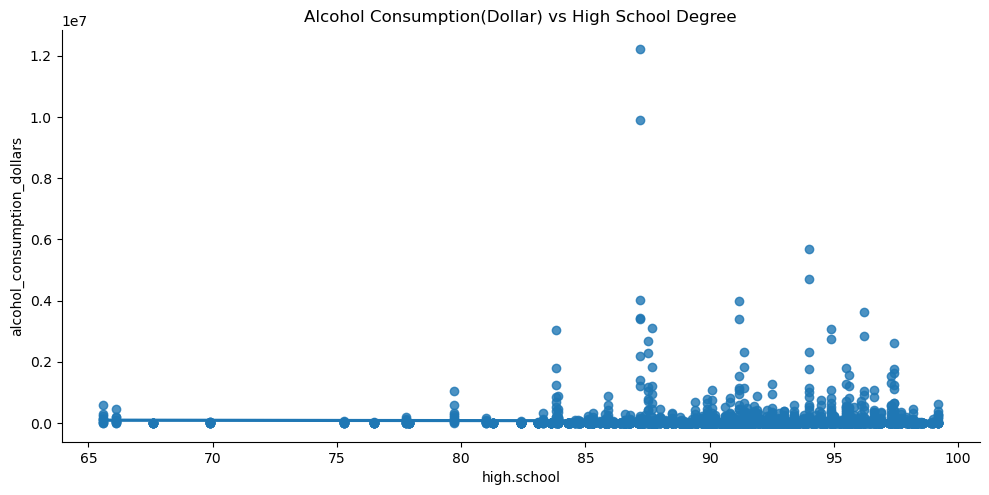

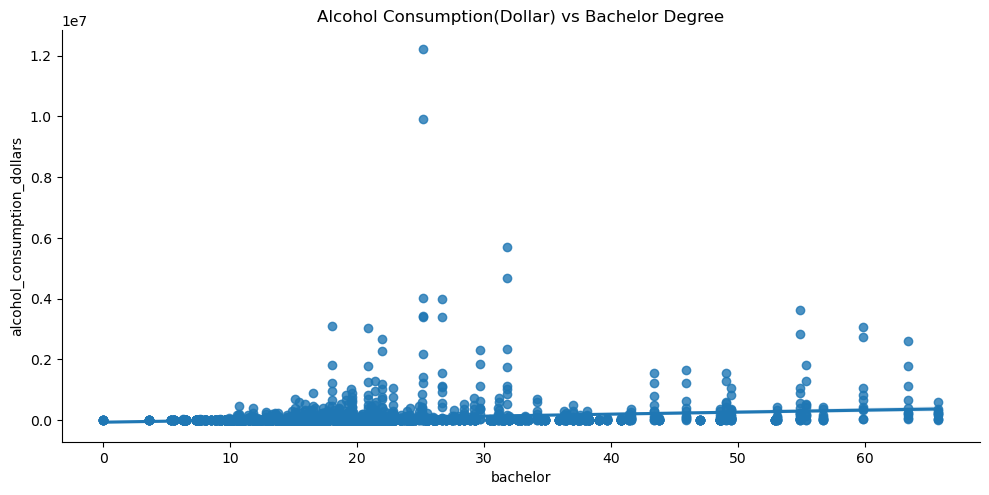

In [13]:
# Scatter plot with regression
sns.lmplot(data=merged_data, x="income", y="alcohol_consumption_dollars", aspect=2, height=5)
plt.title("Alcohol Consumption(Dollar) vs Income")

sns.lmplot(data=merged_data, x="unemployment", y="alcohol_consumption_dollars", aspect=2, height=5)
plt.title("Alcohol Consumption(Dollar) vs Unemployment Rate")

sns.lmplot(data=merged_data, x="high.school", y="alcohol_consumption_dollars", aspect=2, height=5)
plt.title("Alcohol Consumption(Dollar) vs High School Degree")

sns.lmplot(data=merged_data, x="bachelor", y="alcohol_consumption_dollars", aspect=2, height=5)
plt.title("Alcohol Consumption(Dollar) vs Bachelor Degree")


plt.show()


### Scatter Plot with Regression Lines-Volume

/Users/yuhanzhao/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/yuhanzhao/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/yuhanzhao/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/yuhanzhao/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


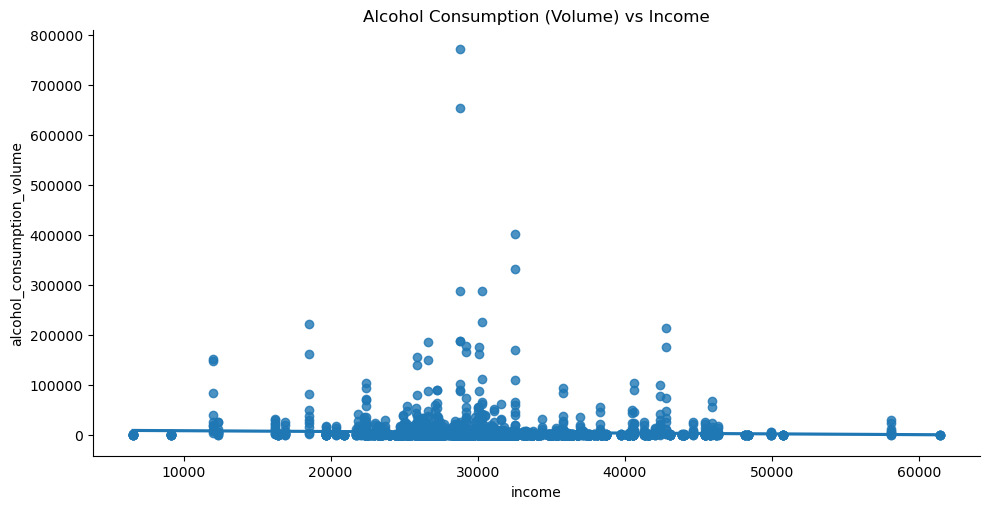

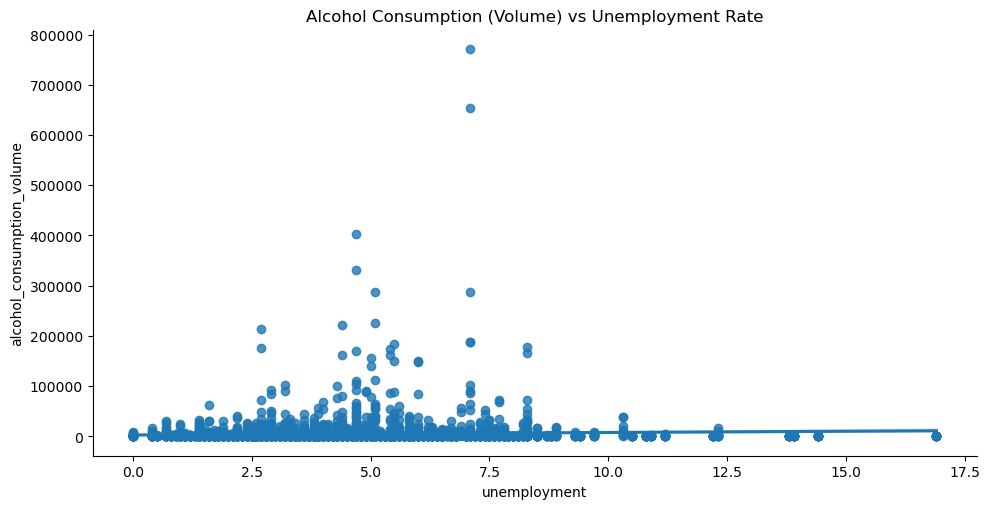

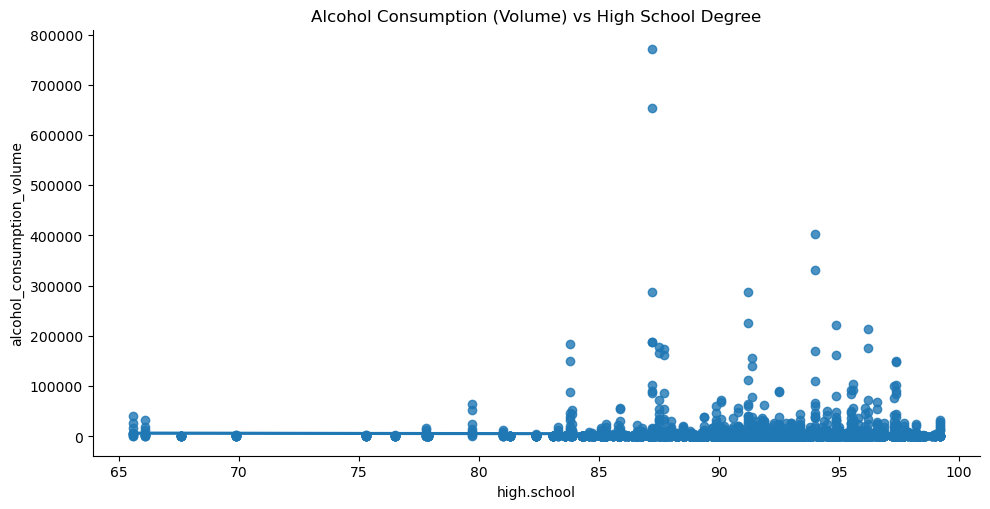

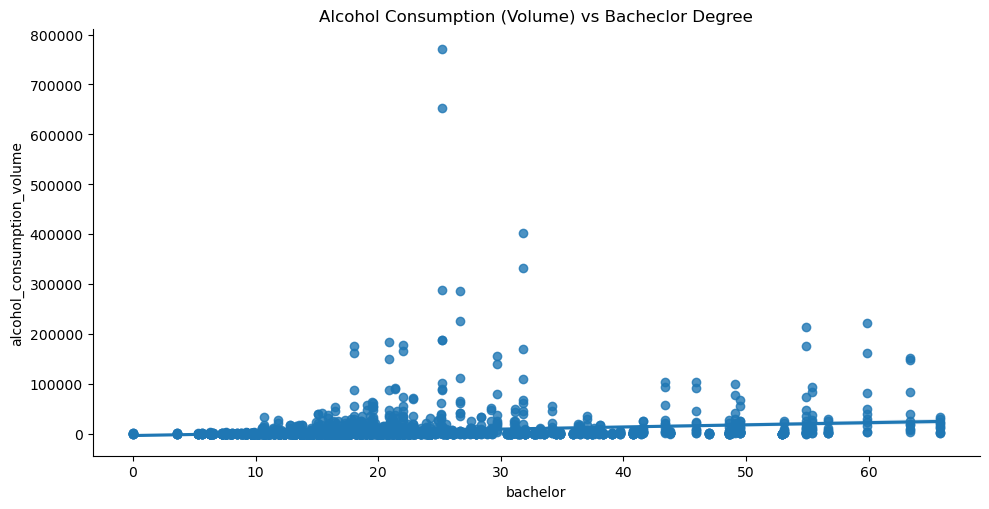

In [14]:
# Scatter plot with regression
sns.lmplot(
    data=merged_data,
    x="income",
    y="alcohol_consumption_volume",
    aspect=2,
    height=5,
)
plt.title("Alcohol Consumption (Volume) vs Income")


sns.lmplot(
    data=merged_data,
    x="unemployment",
    y="alcohol_consumption_volume",
    aspect=2,
    height=5,
)
plt.title("Alcohol Consumption (Volume) vs Unemployment Rate")

sns.lmplot(
    data=merged_data,
    x="high.school",
    y="alcohol_consumption_volume",
    aspect=2,
    height=5,
)
plt.title("Alcohol Consumption (Volume) vs High School Degree")

sns.lmplot(
    data=merged_data,
    x="bachelor",
    y="alcohol_consumption_volume",
    aspect=2,
    height=5,
)
plt.title("Alcohol Consumption (Volume) vs Bacheclor Degree")


plt.show()


### Clustering

/Users/yuhanzhao/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


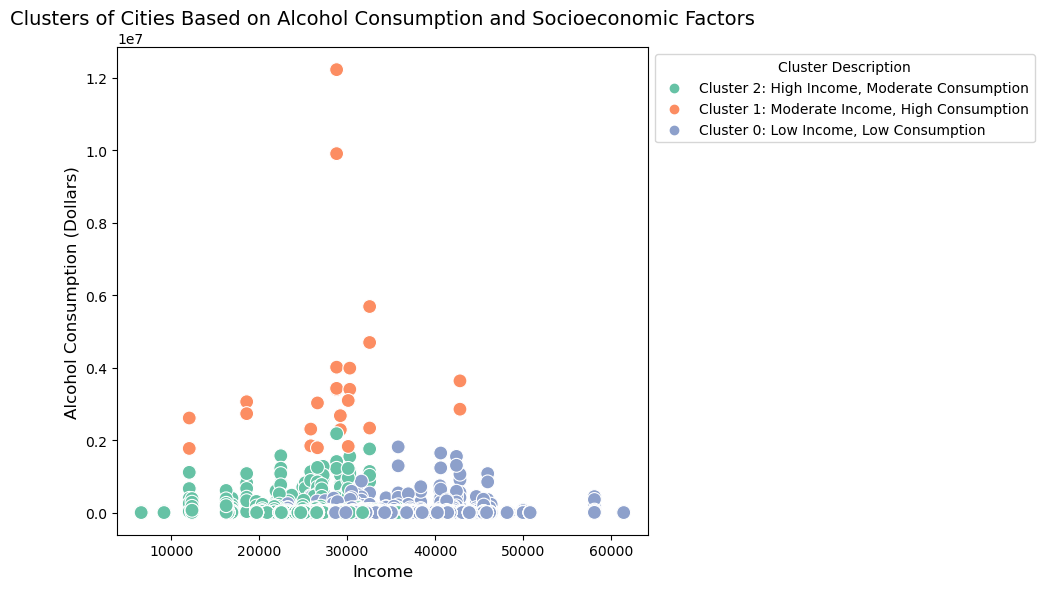

In [15]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Select variables for clustering
cluster_data = merged_data[
    ["alcohol_consumption_dollars", "alcohol_consumption_volume", "income", "unemployment"]
]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
merged_data["cluster"] = kmeans.fit_predict(scaled_data)

# Descriptive labels for clusters
cluster_labels = {
    0: "Cluster 0: Low Income, Low Consumption",
    1: "Cluster 1: Moderate Income, High Consumption",
    2: "Cluster 2: High Income, Moderate Consumption"
}

# Map cluster numbers to descriptive labels
merged_data["cluster_label"] = merged_data["cluster"].map(cluster_labels)

# Visualize clusters with descriptive labels
plt.figure(figsize=(10, 6))  # Adjust figure size for better visualization
sns.scatterplot(
    data=merged_data,
    x="income",
    y="alcohol_consumption_dollars",
    hue="cluster_label",
    palette="Set2",
    s=100  # Adjust size of points
)

# Add plot title and axis labels
plt.title("Clusters of Cities Based on Alcohol Consumption and Socioeconomic Factors", fontsize=14)
plt.xlabel("Income", fontsize=12)
plt.ylabel("Alcohol Consumption (Dollars)", fontsize=12)

# Customize the legend
plt.legend(
    title="Cluster Description",
    loc="upper left",
    bbox_to_anchor=(1, 1),  # Place legend outside the plot
    fontsize=10  # Adjust font size
)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


In [16]:
print(merged_data.columns)

Index(['city', 'category', 'alcohol_consumption_dollars',
       'alcohol_consumption_volume', 'high.school', 'bachelor', 'unemployment',
       'income', 'population', 'pop.white', 'pop.black', 'pop.indian',
       'pop.asian', 'pop.hawai', 'pop.other', 'pop.multi', 'cluster',
       'cluster_label'],
      dtype='object')


# Alcohol Consumption Varies across Racial Groups in Iowa Cities

In [17]:
# Calculate racial proportions as a percentage of the total population
racial_columns = ["pop.white", "pop.black", "pop.indian", "pop.asian", "pop.hawai"]
for col in racial_columns:
    merged_data[col + "_proportion"] = (merged_data[col] / merged_data["population"]) * 100

In [18]:
# Group data by education level
education_race_summary = merged_data.groupby(["high.school", "bachelor"]).agg({
    "pop.white_proportion": "mean",
    "pop.black_proportion": "mean",
    "pop.indian_proportion": "mean",
    "pop.asian_proportion": "mean",
    "pop.hawai_proportion": "mean",
    "alcohol_consumption_dollars": "mean",
    "alcohol_consumption_volume": "mean"
}).reset_index()

education_race_summary

,high.school,bachelor,pop.white_proportion,pop.black_proportion,pop.indian_proportion,pop.asian_proportion,pop.hawai_proportion,alcohol_consumption_dollars,alcohol_consumption_volume
0,65.6,15.4,66.818351,5.052006,0.000000,15.211738,2.070951,159521.400000,11386.300000
1,66.1,10.7,90.751862,2.930579,0.504444,0.372328,0.000000,111792.200000,8330.800000
2,67.6,12.4,85.664182,7.540552,1.183691,0.745287,0.000000,3806.888889,334.888889
3,69.9,10.8,73.441734,3.794038,0.000000,15.221319,0.000000,13008.500000,885.400000
4,75.3,13.8,82.258496,0.000000,0.000000,3.050575,0.321113,16869.000000,1027.100000
...,...,...,...,...,...,...,...,...,...
376,98.6,33.5,97.549020,0.350140,0.000000,0.420168,0.000000,1447.000000,92.571429
377,98.9,48.7,98.072289,0.000000,0.000000,0.240964,0.000000,2922.000000,175.200000
378,99.0,38.0,97.517730,0.000000,0.472813,0.472813,0.000000,22665.000000,932.800000
379,99.2,48.6,95.208845,0.000000,0.000000,2.825553,0.000000,3654.125000,274.000000


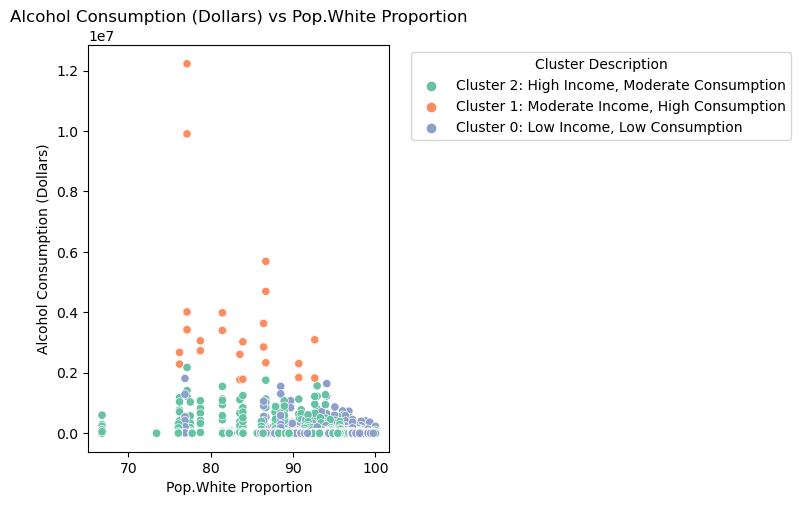

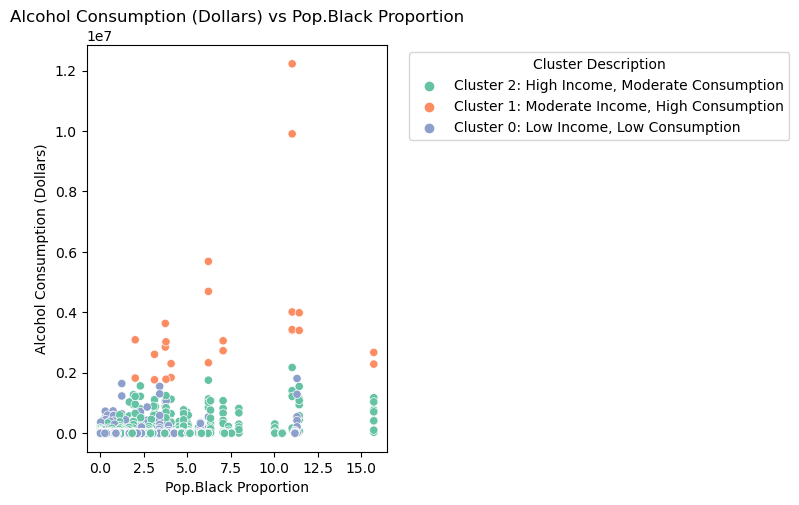

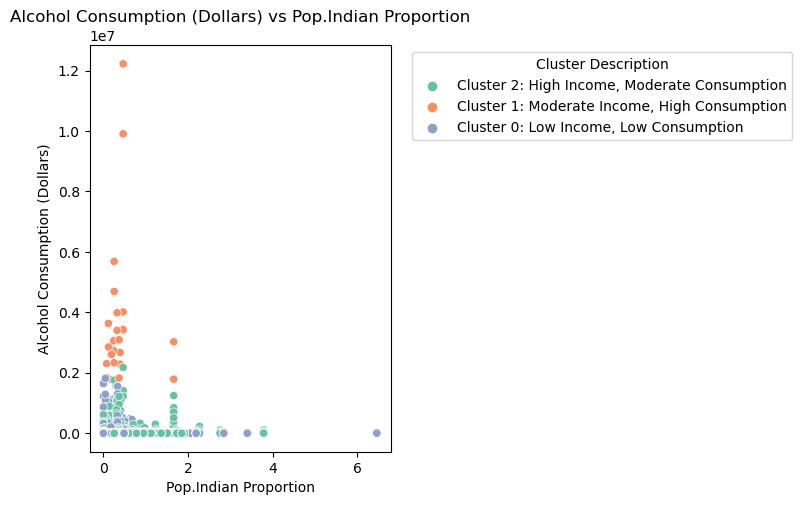

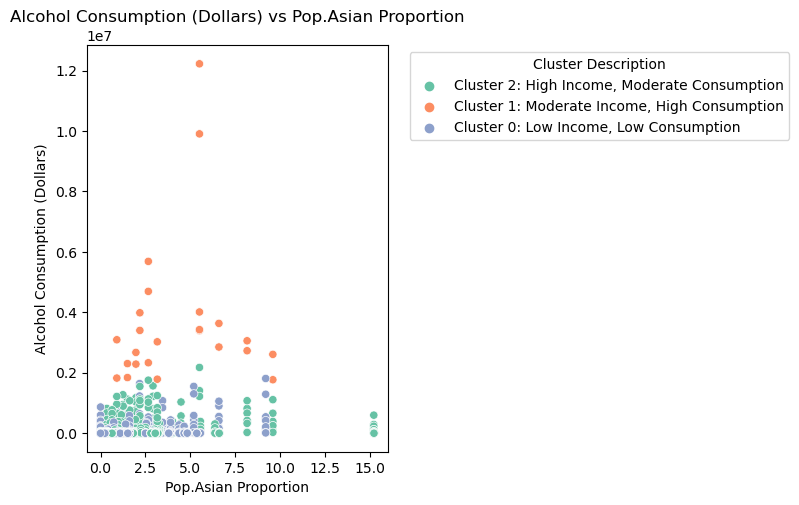

In [22]:
# Scatter plot for alcohol consumption dollars vs racial proportions
racial_proportions = ['pop.white_proportion', 'pop.black_proportion', 'pop.indian_proportion', 'pop.asian_proportion']

for race in racial_proportions:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=merged_data, x=race, y="alcohol_consumption_dollars", hue="cluster_label", palette="Set2")
    plt.title(f"Alcohol Consumption (Dollars) vs {race.replace('_proportion', '').title()} Proportion")
    plt.xlabel(f"{race.replace('_proportion', '').title()} Proportion")
    plt.ylabel("Alcohol Consumption (Dollars)")
    plt.legend(title="Cluster Description", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


### Group by Racial Proportions and Income

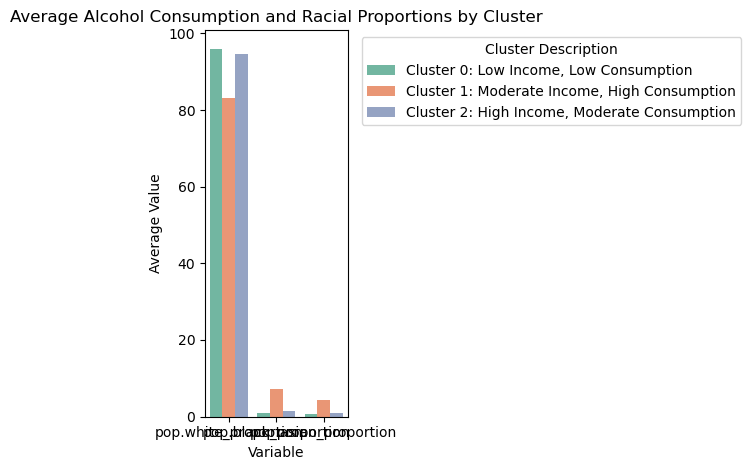

In [25]:
# Group by racial proportions and unemployment
racial_and_economic = merged_data.groupby(["cluster_label"]).agg({
    "pop.white_proportion": "mean",
    "pop.black_proportion": "mean",
    "pop.asian_proportion": "mean",
    "alcohol_consumption_dollars": "mean",
    "income": "mean",
    "unemployment": "mean"
}).reset_index()

# Visualize results
sns.barplot(
    data=racial_and_economic.melt(id_vars=["cluster_label"], value_vars=["pop.white_proportion", "pop.black_proportion","pop.asian_proportion"]),
    x="variable", y="value", hue="cluster_label", palette="Set2"
)
plt.title("Average Alcohol Consumption and Racial Proportions by Cluster")
plt.xlabel("Variable")
plt.ylabel("Average Value")
plt.legend(title="Cluster Description", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Correlation Analysis

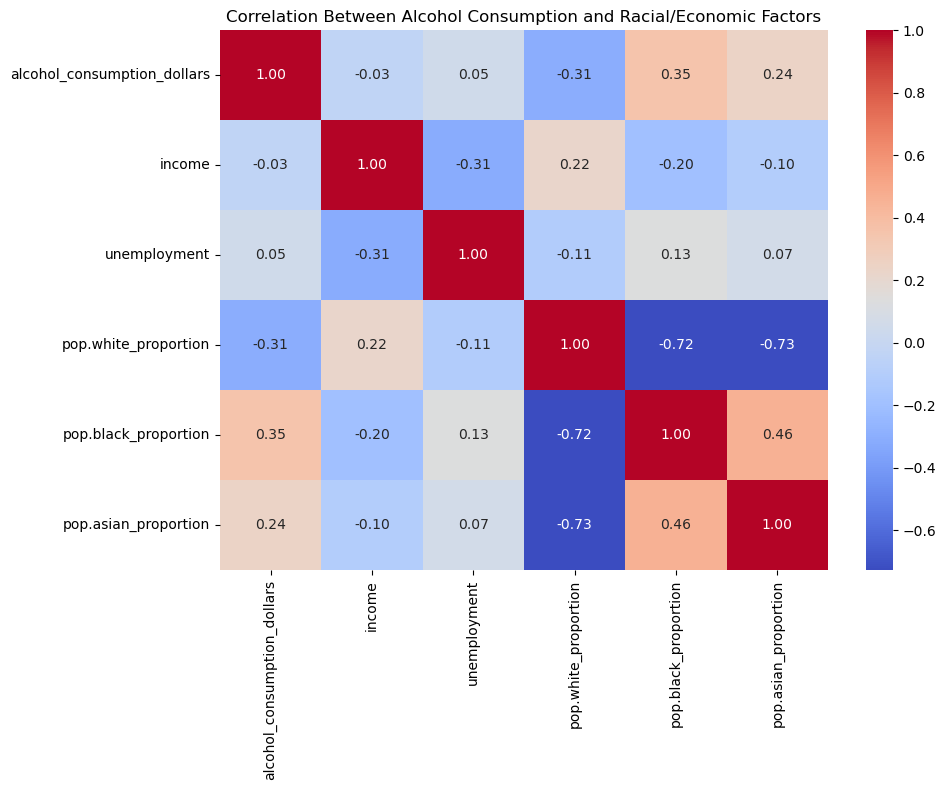

In [32]:
# Select relevant columns for correlation analysis
correlation_data = merged_data[[
    "alcohol_consumption_dollars", "income", "unemployment",
    "pop.white_proportion", "pop.black_proportion", "pop.asian_proportion"
]]

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Between Alcohol Consumption and Racial/Economic Factors")
plt.tight_layout()
plt.show()


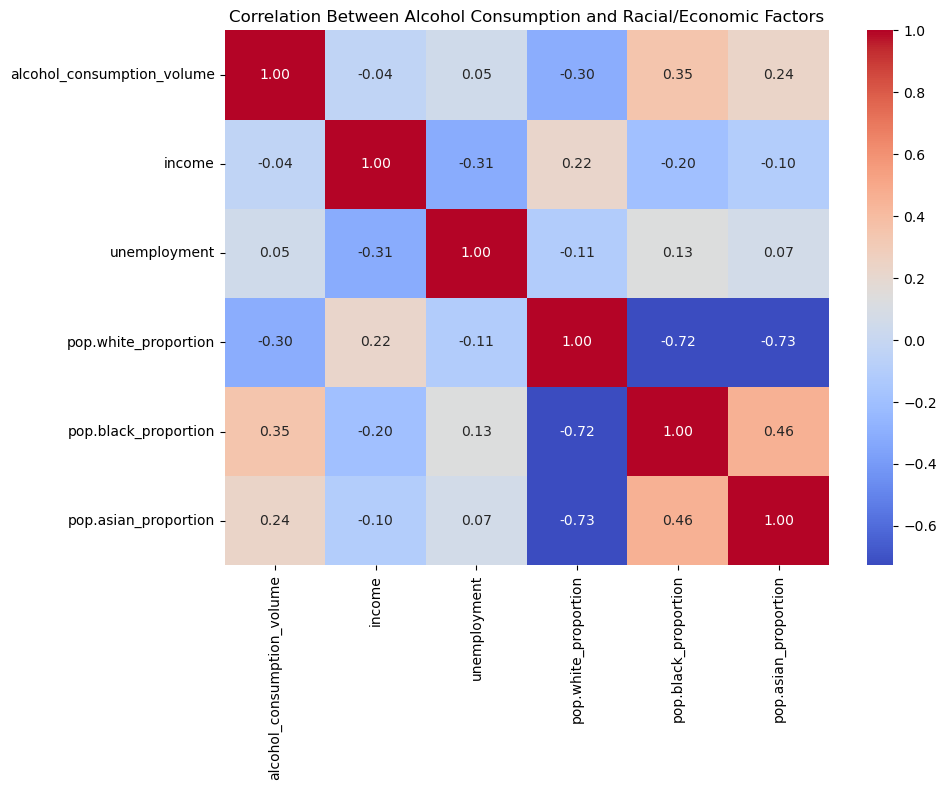

In [33]:
# Select relevant columns for correlation analysis
correlation_data = merged_data[[
    "alcohol_consumption_volume", "income", "unemployment",
    "pop.white_proportion", "pop.black_proportion", "pop.asian_proportion"
]]

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Between Alcohol Consumption and Racial/Economic Factors")
plt.tight_layout()
plt.show()
